# [Python Statistics Fundamentals: How to Describe Your Data](https://realpython.com/python-statistics/)

Типы показателей
В этом учебном пособии вы узнаете о следующих типах показателей описательной статистики:

- Центральная тенденция говорит вам о центрах данных. Полезными показателями являются среднее значение, медиана и мода.
- Изменчивость говорит о разбросе данных. Полезными показателями являются дисперсия и стандартное отклонение.
- Корреляция или совместная изменчивость говорит о связи между парой переменных в наборе данных. Полезные показатели включают ковариацию и коэффициент корреляции.

Вы узнаете, как понять и рассчитать эти показатели с помощью Python.

### Выбросы (outliers)
Выброс - это точка данных, которая значительно отличается от большинства данных, взятых из выборки или популяции. Существует множество возможных причин возникновения выбросов

Точного математического определения выбросов не существует. Вы должны полагаться на опыт, знания об интересующем вас предмете и здравый смысл, чтобы определить, является ли точка данных выбросом и как с ней поступить.

In [25]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        print(f'{func.__name__} took {end - start:.6f} seconds to complete')
        return result
    return wrapper


Они почти одинаковы, с той разницей, что x_with_nan содержит значение nan. Важно понимать поведение статистических процедур Python, когда они сталкиваются с not-a-number value (nan). В науке о данных отсутствующие значения - обычное явление, и вы часто заменяете их на nan.
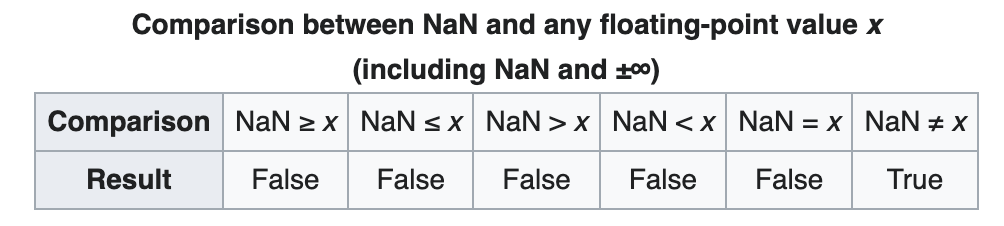

In [3]:
# Samples
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]

print(math.isnan(np.nan), np.isnan(math.nan))
print(math.isnan(x_with_nan[3]), np.isnan(x_with_nan[3]))

True True
True True


In [9]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

print(f'NParray{y}')
print(f'NParray{y_with_nan}, {type(y_with_nan)}')
print(f'dataframe{z}')
print(f'dataframe{z_with_nan}, {type(z_with_nan)}')

NParray[ 8.   1.   2.5  4.  28. ]
NParray[ 8.   1.   2.5  nan  4.  28. ], <class 'numpy.ndarray'>
dataframe0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64
dataframe0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64, <class 'pandas.core.series.Series'>


### Measures of Central Tendency

The measures of central tendency show the central or middle values of datasets. There are several definitions of what’s considered to be the center of a dataset. In this tutorial, you’ll learn how to identify and calculate these measures of central tendency:

- Mean Среднее
- Weighted mean средневзвешенное среднее
- Geometric mean среднее геометрическое
- Harmonic mean Гармоническое среднее
- Median Медиана
- Mode Мода

## Среднее

Среднее значение выборки, также называемое средним арифметическим или просто средним, - это среднее арифметическое всех элементов в наборе данных. Среднее значение набора данных 𝑥 математически выражается как Σᵢ𝑥ᵢ/𝑛, где 𝑖 = 1, 2, ..., 𝑛. Другими словами, это сумма всех элементов 𝑥ᵢ, деленная на количество элементов в наборе данных 𝑥.

In [11]:
mean_ = sum(x) / len(x)
print(mean_)
mean_ = statistics.mean(x)
mean_ = statistics.fmean(x)
print(mean_)

8.7
8.7


Вы вызвали функции mean() и fmean() из встроенной библиотеки статистики Python и получили тот же результат, что и при использовании чистого Python. `fmean() появилась в Python 3.8 как более быстрая альтернатива mean()`. Она всегда возвращает число с плавающей точкой.

However, if there are `nan` values among your data, then `statistics.mean() and statistics.fmean()` will return `nan `as the output:

In [12]:
mean_ = statistics.mean(x_with_nan)
print(mean_)
mean_ = np.mean(y)
print(mean_)

nan
8.7


В приведенном выше примере mean() - это функция, но вы можете использовать и соответствующий метод .mean():

In [14]:
mean_ = y.mean()
print(mean_)
# >>> np.mean(y_with_nan)
# nan
# >>> y_with_nan.mean()
# nan

8.7


Часто вам не нужно получать значение nan в качестве результата. Если вы предпочитаете игнорировать значения nan, то можете использовать `np.nanmean()`:

In [19]:
print(np.nanmean(y_with_nan))
# pd.Series objects also have the method .mean():
# As you can see, it’s used similarly as in the case of NumPy. 
# However, .mean() from pandas ignores nan values by default:
mean_ = z.mean()
print(mean_)
print(z_with_nan.mean())

8.7
8.7
8.7


### Взвешенное среднее

Взвешенное среднее, также называемое взвешенным средним арифметическим или взвешенным средним, является обобщением среднего арифметического, которое позволяет определить относительный вклад каждой точки данных в результат.

In [20]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)
wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)
6.95

6.95
6.95


6.95

In [28]:
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
print(wmean)
wmean = np.average(z, weights=w)
print(wmean)
print((w * y).sum() / w.sum())

6.95
6.95
6.95


### median

 Медиана выборки - это средний элемент отсортированного набора данных. Набор данных может быть отсортирован в порядке возрастания или убывания. Если число элементов 𝑛 набора данных нечетное, то медиана - это значение в средней позиции: 0.5(𝑛 + 1). Если 𝑛 четное, то медиана - это среднее арифметическое двух значений в середине, то есть элементов в позициях 0,5𝑛 и 0,5𝑛 + 1.

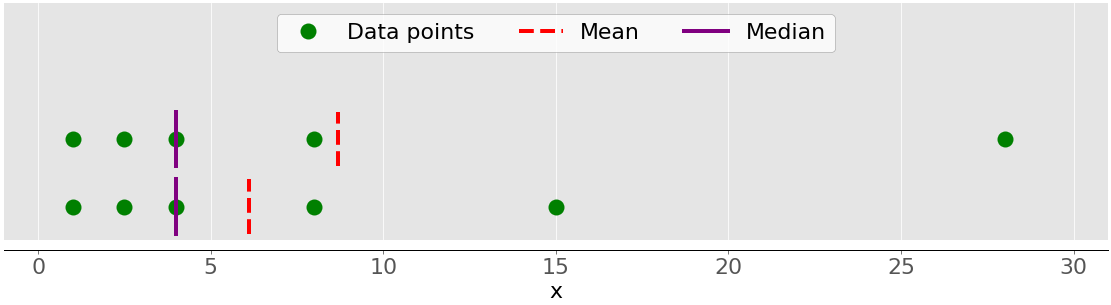




Если количество элементов нечетное, то существует одно среднее значение, поэтому эти функции ведут себя так же, как median().

Если количество элементов четное, то существует два средних значения. В этом случае median_low() возвращает меньшее, а median_high() - большее среднее значение.

In [ ]:
median_ = statistics.median(x)
median_ = statistics.median(x[:-1])
statistics.median_low(x[:-1])
statistics.median_high(x[:-1])
statistics.median(x_with_nan)
statistics.median_low(x_with_nan)
statistics.median_high(x_with_nan)
median_ = np.median(y)
median_ = np.median(y[:-1])
np.nanmedian(y_with_nan)
np.nanmedian(y_with_nan[:-1])

# pandas Series objects have the method .median() that ignores nan values by default:
z.median()
z_with_nan.median()

### Мода

Мода - это значение в наборе данных, которое встречается наиболее часто. Если нет ни одного такого значения, то набор является мультимодальным, поскольку имеет несколько модальных значений. Например, в наборе, содержащем точки 2, 3, 2, 8 и 12, число 2 является модой, поскольку оно встречается дважды, в отличие от других элементов, которые встречаются только один раз.

In [31]:
v = [12, 15, 12, 15, 21, 15, 12]
print(statistics.mode(v))  # Raises StatisticsError (странно типа 2 числа а он)
print(statistics.multimode(v))
# >>> statistics.mode([2, math.nan, 2])
# 2
# >>> statistics.multimode([2, math.nan, 2])
# [2]
# >>> statistics.mode([2, math.nan, 0, math.nan, 5])
# nan
# >>> statistics.multimode([2, math.nan, 0, math.nan, 5])
# [nan]

12
[12, 15]


In [36]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]
u, v = np.array(u), np.array(v)
mode_ = scipy.stats.mode(u)
print(mode_)
mode_ = scipy.stats.mode(v)
print(mode_)

print(mode_.mode)
print(mode_.count)

ModeResult(mode=array([2]), count=array([2]))
ModeResult(mode=array([12]), count=array([3]))
[12]
[3]


/var/folders/77/k237slcs6gv41pmr9lvp716w0000gn/T/ipykernel_87487/2890166366.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_ = scipy.stats.mode(u)
/var/folders/77/k237slcs6gv41pmr9lvp716w0000gn/T/ipykernel_87487/2890166366.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to av

In [37]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int64
0    12
1    15
dtype: int64
0    2.0
dtype: float64


### Меры изменчивости

Меры центральной тенденции недостаточно для описания данных. Вам также понадобятся меры изменчивости, которые количественно определяют разброс точек данных. В этом разделе вы узнаете, как определить и рассчитать следующие показатели изменчивости:

- ДисперсияVariance
- Стандартное отклонениеStandard deviation
- ПерекосSkewness
- ПроцентилиPercentiles
- ДиапазоныRanges

впадлу эту часть печатать, ее знаю норм

## Сводка описательной статистики

SciPy и pandas предлагают полезные процедуры для быстрого получения описательной статистики с помощью одной функции или вызова метода. Вы можете использовать scipy.stats.describe() следующим образом:

In [38]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

# >>> result.nobs
# 9
# >>> result.minmax[0]  # Min
# -5.0
# >>> result.minmax[1]  # Max
# 41.0
# >>> result.mean
# 11.622222222222222
# >>> result.variance
# 228.75194444444446
# >>> result.skewness
# 0.9249043136685094
# >>> result.kurtosis
# 0.14770623629658886

DescribeResult(nobs=5, minmax=(1.0, 28.0), mean=8.7, variance=123.19999999999999, skewness=1.9470432273905927, kurtosis=3.878019618875446)

describe() возвращает объект, содержащий следующие описательные статистики:

- nobs: количество наблюдений или элементов в вашем наборе данных
- minmax: кортеж с минимальным и максимальным значениями вашего набора данных
- mean: среднее значение вашего набора данных
- variance: дисперсия вашего набора данных
- skewness: асимметрия вашего набора данных
- kurtosis: эксцесс вашего набора данных

Он возвращает новую серию, содержащую следующие данные:

- count: количество элементов в вашем наборе данных
- mean: среднее значение вашего набора данных
- std: стандартное отклонение вашего набора данных
- min и max: минимальное и максимальное значения вашего набора данных
- 25%, 50% и 75%: квартили вашего набора данных

In [40]:
# pandas имеет аналогичную, если не лучшую, функциональность. У объектов серии есть метод .describe():
result = z.describe()
result
# >>> result['mean']
# 11.622222222222222
# >>> result['std']
# 15.12454774346805
# >>> result['min']
# -5.0
# >>> result['max']
# 41.0
# >>> result['25%']
# 0.1
# >>> result['50%']
# 8.0
# >>> result['75%']
#  21.0

count     5.00000
mean      8.70000
std      11.09955
min       1.00000
25%       2.50000
50%       4.00000
75%       8.00000
max      28.00000
dtype: float64

### Меры корреляции между парами данных
Часто возникает необходимость изучить взаимосвязь между соответствующими элементами двух переменных в наборе данных. 

Допустим, есть две переменные, 𝑥 и 𝑦, с одинаковым количеством элементов, 𝑛. Пусть 𝑥₁ из 𝑥 соответствует 𝑦₁ из 𝑦, 𝑥₂ из 𝑥 - 𝑦₂ из 𝑦, и так далее. Тогда можно сказать, что существует 𝑛 пар соответствующих элементов: (𝑥₁, 𝑦₁), (𝑥₂, 𝑦₂) и так далее.

Вы увидите следующие показатели корреляции между парами данных:

- Положительная корреляция существует, когда большие значения 𝑥 соответствуют большим значениям 𝑦 и наоборот.
- Отрицательная корреляция существует, когда большие значения 𝑥 соответствуют меньшим значениям 𝑦 и наоборот.
- Слабая корреляция или отсутствие корреляции имеет место, если нет такой очевидной связи.

In [41]:
# Data
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

### Ковариация
Ковариация выборки - это мера, которая количественно определяет силу и направление связи между парой переменных:

- Если корреляция положительна, то ковариация также положительна. Более сильная связь соответствует более высокому значению ковариации.
- Если корреляция отрицательная, то и ковариация отрицательная. Более сильная связь соответствует более низкому (или более высокому по абсолютной величине) значению ковариации.
- Если корреляция слабая, то ковариация близка к нулю.

Ковариация переменных 𝑥 и 𝑦 математически определяется как 𝑠ˣʸ = Σᵢ (𝑥ᵢ - mean(𝑥)) (𝑦ᵢ - mean(𝑦)) / (𝑛 - 1), где 𝑖 = 1, 2, ..., 𝑛, mean(𝑥) - выборочное среднее 𝑥, а mean(𝑦) - выборочное среднее 𝑦. Из этого следует, что ковариация двух одинаковых переменных фактически является дисперсией: 𝑠ˣˣ = Σᵢ(𝑥ᵢ - mean(𝑥))² / (𝑛 - 1) = (𝑠ˣ)² и 𝑠ʸʸ = Σᵢ(𝑦ᵢ - mean(𝑦))² / (𝑛 - 1) = (𝑠ʸ)².

In [42]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
cov_xy

19.95

In [43]:
# NumPy has the function cov() that returns the covariance matrix:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

Обратите внимание, что cov() имеет необязательные параметры bias, который по умолчанию равен False, и ddof, который по умолчанию равен None. `Их значения по умолчанию подходят для получения ковариационной матрицы выборки. Верхний левый элемент ковариационной матрицы - это ковариация x и x, или дисперсия x. Аналогично, нижний правый элемент - это ковариация y и y, или дисперсия y. Вы можете проверить, верно ли это:`

In [44]:
# pandas Series have the method .cov() that you can use to calculate the covariance:
cov_xy = x__.cov(y__)
cov_xy

19.95

## Коэффициент корреляции
Коэффициент корреляции, или коэффициент корреляции Пирсона (Pearson product-moment correlation coefficient), обозначается символом 𝑟. Этот коэффициент является еще одной мерой корреляции между данными. Его можно представить как стандартизированную ковариацию. Вот некоторые важные факты о нем:

- Значение 𝑟 > 0 указывает на положительную корреляцию.
- Значение 𝑟 < 0 указывает на отрицательную корреляцию.
- Значение r = 1 является максимально возможным значением 𝑟. Оно соответствует идеальной положительной линейной связи между переменными.
- Значение r = -1 является минимально возможным значением 𝑟. Оно соответствует идеальной отрицательной линейной зависимости между переменными.
- Значение r ≈ 0, или когда 𝑟 около нуля, означает, что корреляция между переменными слабая.

In [45]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

In [48]:
# scipy.stats has the routine pearsonr() that calculates the correlation coefficient and the 𝑝-value:

r, p = scipy.stats.pearsonr(x_, y_)
print(r, p)

0.8619500056316062 5.122760847201098e-07


In [49]:
# Similar to the case of the covariance matrix, you can apply np.corrcoef()
# with x_ and y_ as the arguments and get the correlation coefficient matrix:

corr_matrix = np.corrcoef(x_, y_)
corr_matrix


array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [50]:
# Конечно, результат будет таким же, как и при использовании чистого Python и pearsonr().

# Коэффициент корреляции можно получить с помощью scipy.stats.linregress():
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)